# Anlysis of the Incel Communities Network (insert network when Adreas has created it)

In [7]:
#Import relevant libraries
import json
import networkx as nx
import netwulf as nw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
from itertools import product
from collections import Counter
import networkx as nx
import random
from wordcloud import WordCloud
from tqdm import tqdm
from joblib import Parallel, delayed

In [10]:
#INSERT INCEL NETWORK HERE:
#load the CSS-network that was created in assignment 1
def load_network_from_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
        G = nx.node_link_graph(data, edges="links")
    return G

file_path = 'data/network_with_attributes.json'
G = load_network_from_json(file_path)


print(f'The number of nodes in G is {G.number_of_nodes()} and the amount of edges are {G.number_of_edges()}')
print(f'The denisty of G is {nx.density(G)}')
print(f'Is the graph fully connected: {nx.is_connected(G)}')

The number of nodes in G is 8478 and the amount of edges are 23778
The denisty of G is 0.0006617130855140186
Is the graph fully connected: False


# Baseline network - a random network to compare with

In [12]:
N = G.number_of_nodes() #8478
L = G.number_of_edges() #23778

p = 2*L/(N*(N-1)) 

#calculate the average degree using p
k = p*(N-1)
print(f'The probability of a link between two nodes is: {p}')
print(f'Average degree of the incel-network: {k}')

The probability of a link between two nodes is: 0.0006617130855140186
Average degree of the incel-network: 5.6093418259023355


In [14]:
#function to calculate generate random network:
def generate_random_network(node_count, probability):
    random_network = nx.Graph()
    nodes = range(node_count)
    random_network.add_nodes_from(nodes)

    for i in nodes:
        for j in nodes:
            if i < j:
                if np.random.uniform(0, 1) < probability:
                    random_network.add_edge(i, j)

    return random_network

# Generate random network
random_network = generate_random_network(N, p)

In [15]:
# Print some information about the generated random network
print(f'The number of nodes in G is {random_network.number_of_nodes()} and the amount of edges are {random_network.number_of_edges()}')
print(f'The denisty of G is {nx.density(random_network)}')
print(f'Is the graph fully connected: {nx.is_connected(random_network)}')
print(f'The average degree of the random network is {np.mean([degree for node, degree in random_network.degree()])}')

The number of nodes in G is 8478 and the amount of edges are 23922
The denisty of G is 0.0006657204319819309
Is the graph fully connected: False
The average degree of the random network is 5.643312101910828


/Users/KAROLINE/opt/miniconda3/envs/ctfds/lib/python3.11/site-packages/networkx/readwrite/json_graph/node_link.py:145: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


Text(0.5, 1.0, 'Random network')

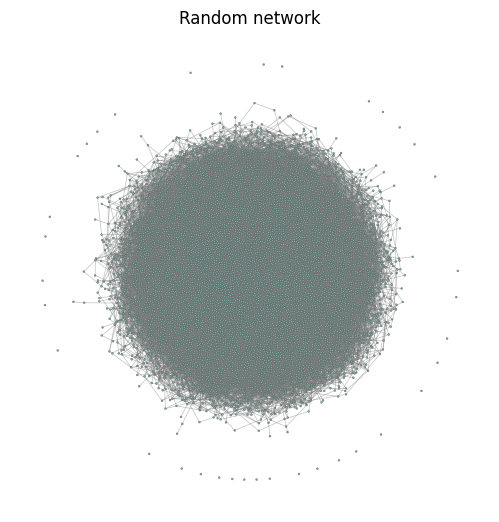

In [16]:
network, config = nw.visualize(random_network, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network)
ax.set_title('Random network')

/Users/KAROLINE/opt/miniconda3/envs/ctfds/lib/python3.11/site-packages/networkx/readwrite/json_graph/node_link.py:145: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


Text(0.5, 1.0, 'CSS-network')

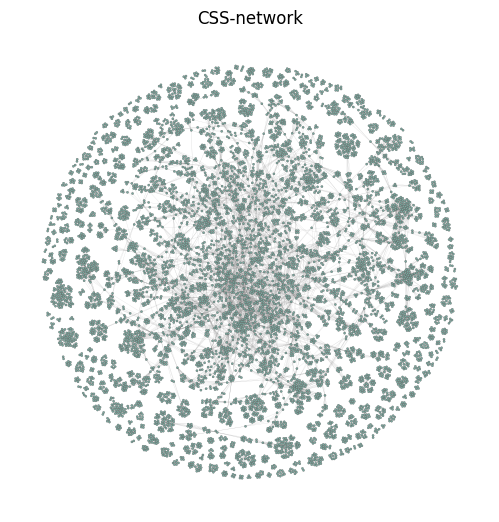

In [17]:
network, config = nw.visualize(G, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network)
ax.set_title('CSS-network')

# Degree distribution

In [18]:
# Obtain the degrees of all nodes in the random network and CSS-network
Normal_degrees = [degree for node, degree in random_network.degree()]
CSS_degrees = [degree for node, degree in G.degree()]   


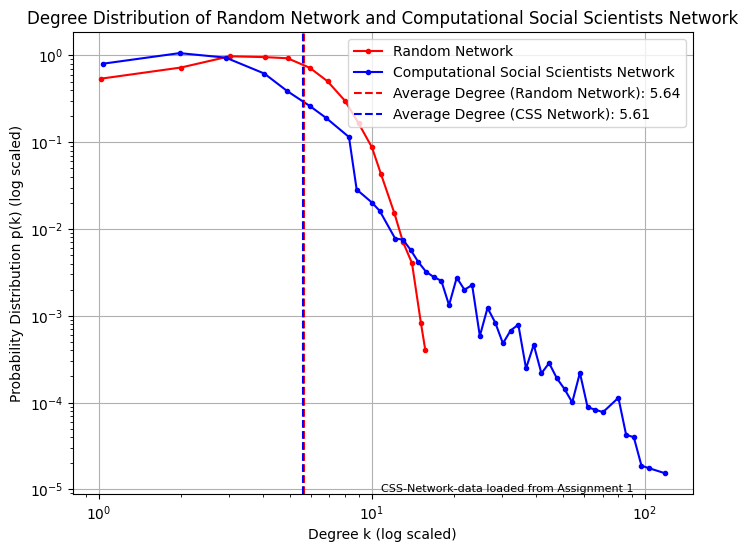

In [19]:
#Visualize the degree distribution of the random network and the CSS-network
# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Define bins using logspace for logarithmic scaling
bins_norm = np.logspace(0, np.log10(max(Normal_degrees)), 75)
bins_css = np.logspace(np.log10(min(CSS_degrees)), np.log10(max(CSS_degrees)), 75)

# define the degree distribution of the random network
hist_normal, edges_normal = np.histogram(Normal_degrees, bins=bins_norm, density=True)
x_norm = (edges_normal[1:] + edges_normal[:-1]) / 2

# Filter empty bins
xx_norm, yy_norm = zip(*[(i, j) for (i, j) in zip(x_norm, hist_normal) if j > 0])

# define the degree distribution of the Computational Social Scientists network
hist_css, edges_css = np.histogram(CSS_degrees, bins=bins_css, density=True)
x_css = (edges_css[1:] + edges_css[:-1]) / 2

# Filter empty bins
xx_css, yy_css = zip(*[(i, j) for (i, j) in zip(x_css, hist_css) if j > 0])

# Plot them
ax.plot(xx_norm, yy_norm, marker='.', label='Random Network', color='r')
ax.plot(xx_css, yy_css, marker='.', label='Computational Social Scientists Network', color='b')

# Calculate average degree for both networks
avg_degree_random = np.mean(Normal_degrees)
avg_degree_css = np.mean(CSS_degrees)

# Add vertical lines for average degrees
ax.axvline(avg_degree_random, color='r', linestyle='--', label=f'Average Degree (Random Network): {avg_degree_random:.2f}')
ax.axvline(avg_degree_css, color='b', linestyle='--', label=f'Average Degree (CSS Network): {avg_degree_css:.2f}')

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Degree k (log scaled)')
ax.set_ylabel('Probability Distribution p(k) (log scaled)')
ax.set_title('Degree Distribution of Random Network and Computational Social Scientists Network')
ax.legend()

# Show grid
ax.grid(True) 

 
data_source = "CSS-Network-data loaded from Assignment 1" 
plt.text(0.7, 0.0, data_source, ha='center', va='bottom', transform=ax.transAxes, fontsize=8)

# Show the plot
plt.show()


# Communities

In [31]:
communities = nx.community.louvain_communities(G,seed=42)
# Print the resulting communities
print("Louvain Community Partition:")
print(communities)

Louvain Community Partition:
[{'https://openalex.org/A5055266860', 'https://openalex.org/A5026488324', 'https://openalex.org/A5064182158', 'https://openalex.org/A5001943588', 'https://openalex.org/A5051217751', 'https://openalex.org/A5088689066', 'https://openalex.org/A5069608785', 'https://openalex.org/A5004772750', 'https://openalex.org/A5014165064', 'https://openalex.org/A5073180609', 'https://openalex.org/A5053356621', 'https://openalex.org/A5064153354', 'https://openalex.org/A5035990031', 'https://openalex.org/A5013672972', 'https://openalex.org/A5039357092', 'https://openalex.org/A5091679861', 'https://openalex.org/A5003317688', 'https://openalex.org/A5055257973', 'https://openalex.org/A5066347164', 'https://openalex.org/A5089409963', 'https://openalex.org/A5072577967', 'https://openalex.org/A5083773367', 'https://openalex.org/A5037057896', 'https://openalex.org/A5073215218', 'https://openalex.org/A5090932272', 'https://openalex.org/A5051816779', 'https://openalex.org/A5080825557

In [21]:
G_communities = G.copy()
# Assign community as a node attribute
for i, community in enumerate(communities):
    for node in community:
        G_communities.nodes[node]['community'] = i



In [29]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='netwulf')

The top-5 communities and their assigned colors: {0: 'cyan', 1: 'blue', 2: 'forestgreen', 3: 'magenta', 4: 'darkorange'}

Number of nodes per community: {0: 347, 1: 255, 2: 251, 3: 217, 4: 216}

Total nodes in the top-5 subgraph: 1286


/Users/KAROLINE/opt/miniconda3/envs/ctfds/lib/python3.11/site-packages/networkx/readwrite/json_graph/node_link.py:145: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


Text(0.5, 1.0, 'Top 5 Louvain communities (netwulf)')

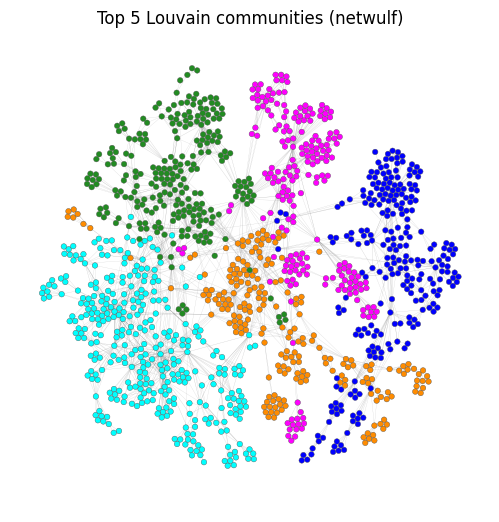

In [30]:
import networkx as nx
from netwulf import visualize, draw_netwulf

# --- 0) Compute Louvain communities if you haven't already
# communities = nx.community.louvain_communities(G, seed=42)

# --- 1) Subgraph with the 5 largest communities
sorted_comms = sorted(communities, key=len, reverse=True)[:5]
nodes = set().union(*sorted_comms)
subgraph = G.subgraph(nodes).copy()  # copy so we can set attributes

# For robustness, (re)assign a compact community index 0..4 to every node in the subgraph
node2comm = {}
for i, comm in enumerate(sorted_comms):
    for n in comm:
        node2comm[n] = i
nx.set_node_attributes(subgraph, node2comm, name='community')

# --- 2) Colors per community (CSS/matplotlib-friendly names)
colors = ['cyan', 'blue', 'forestgreen', 'magenta', 'darkorange', 'darkviolet']  # 6 in case you up k
n_colors = len(colors)
comm_colors = {i: colors[i % n_colors] for i in range(len(sorted_comms))}

# Attach the color to each node for netwulf
for n, c in node2comm.items():
    subgraph.nodes[n]['color'] = comm_colors[c]
    # (optional aesthetics)
    # subgraph.nodes[n]['size'] = 4 + 1.5 * subgraph.degree[n]

# --- 3) Small summary
community_length = {i: len(comm) for i, comm in enumerate(sorted_comms)}
print(f"The top-5 communities and their assigned colors: { {i: comm_colors[i] for i in range(len(sorted_comms))} }\n")
print(f"Number of nodes per community: {community_length}\n")
print(f"Total nodes in the top-5 subgraph: {subgraph.number_of_nodes()}")

# --- 4) Plot with netwulf
title = "Top 5 Louvain communities (netwulf)"
network, config = visualize(subgraph)       # interactively adjust if you want
fig, ax = draw_netwulf(network, config)     # static render of the current network/config
ax.set_title(title)


In [37]:
# Look at the first few nodes with attributes
nodes = list(G.nodes(data=True))[:5]
print("\nSample nodes (with attributes):")
for node, attrs in nodes:
    print(node, attrs)

# Look at the first few edges with attributes
edges = list(G.edges(data=True))[:5]
print("\nSample edges (with attributes):")
for u, v, attrs in edges:
    print((u, v), attrs)


Sample nodes (with attributes):
https://openalex.org/A5000017075 {'display_name': 'Pavlin Mavrodiev', 'country_code': 'CH', 'cited_by_count': 180, 'first_publication_year': 2013}
https://openalex.org/A5020270223 {'display_name': 'Claudio J. Tessone', 'country_code': 'CH', 'cited_by_count': 113, 'first_publication_year': 2013}
https://openalex.org/A5037087050 {'display_name': 'Eduardo López', 'country_code': 'US', 'cited_by_count': 476, 'first_publication_year': 2014}
https://openalex.org/A5048877432 {'display_name': 'Bruno Lepri', 'country_code': 'IT', 'cited_by_count': 637, 'first_publication_year': 2006}
https://openalex.org/A5037077388 {'display_name': 'Stefan A. Frisch', 'country_code': 'US', 'cited_by_count': 361, 'first_publication_year': 2004}

Sample edges (with attributes):
('https://openalex.org/A5000017075', 'https://openalex.org/A5020270223') {'weight': 1}
('https://openalex.org/A5000017075', 'https://openalex.org/A5082884831') {'weight': 1}
('https://openalex.org/A5000017

In [39]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort by centrality descending
sorted_degree = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)

# Take top 15 nodes
top15_degree = sorted_degree[:15]

# Print top 15 authors by degree centrality
for idx, (node, degree) in enumerate(top15_degree):
    name = G.nodes[node].get('display_name', 'Unknown')
    print(f"{idx+1}. {name} — degree centrality: {round(degree, 4)}")


1. Jonathan D. Cohen — degree centrality: 0.0144
2. Denny Borsboom — degree centrality: 0.0123
3. Qin Li — degree centrality: 0.0112
4. Jon Kleinberg — degree centrality: 0.0111
5. Qin Wang — degree centrality: 0.0109
6. Stephan Lewandowsky — degree centrality: 0.01
7. Linda Steg — degree centrality: 0.0099
8. Niel Hens — degree centrality: 0.0096
9. János Kertész — degree centrality: 0.0096
10. Matt Sutton — degree centrality: 0.0094
11. Lyle H. Ungar — degree centrality: 0.0092
12. Nicholas A. Christakis — degree centrality: 0.0092
13. Dan Jurafsky — degree centrality: 0.0084
14. Alain Barrat — degree centrality: 0.0083
15. Robert West — degree centrality: 0.0081
